In [8]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('../data/wine_data_final.csv')

We separated the thick-skin grapes from the thin-skin grapes for they have different growth patterns. This model below represents the thick grapes (Cabernet Sauvignon, Zinfandel, Syrah). Realized there was no snow at all throughout the season, so we got rid of that feature just for this model. Some years had some very corrupt weather data, so some years had to be discarded which may have affected our predictions. We conducted this using 5-fold cross-validation for the purpose of using all of the data for both training and testing. I tried multiple models such as Lasso, Ridge, and Linear Regression from the sklearn library, all of which were very similar. The RMSE for each model is around 2.4 which isn't too bad. With the lack of some weather features and only 233 ratings to base our model off of, 2.4 is actually pretty good. The range of the real ratings was between 84 and 96 with a mean of 91.

In [12]:
df_0 = df[df['skin'] == 0] # 96
df_avg_0 = pd.DataFrame(columns = ['tavg','tmin','tmax','prcp','snow','wspd','pres','quality'])
j = 0
for i, rows in df_0.iterrows():
  weather = pd.read_csv('../data/complete_weather/' + df_0['file'][i])
  df_avg_0 = df_avg_0.append(weather.mean(), ignore_index=True)
  df_avg_0['quality'][j] = df_0['quality'][i]
  j += 1
df_avg_0 = df_avg_0.dropna() # now 83
del df_avg_0['snow']
# display(df_avg_0)

In [13]:
x_0 = df_avg_0[['tavg','tmin','tmax','prcp','wspd','pres']].to_numpy() # features
y_0 = df_avg_0['quality'].to_numpy() # target

model = LinearRegression()
y_pred_0 = cross_val_predict(model, x_0, y_0, cv = 5)
# print(y_0)
# print(y_pred_0)
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_0, y_pred_0)))

RMSE: 2.336


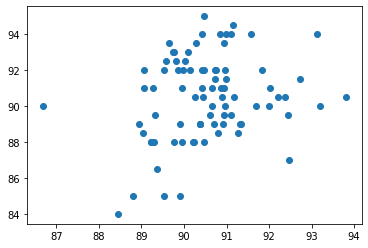

In [14]:
plt.scatter(y_pred_0, y_0)
plt.show()

In [15]:
tck_corr, _ =  pearsonr(y_pred_0, y_0)
tck_corr

0.23173343442327018

This model below represents the thin grapes (Pinot Noir and Chardonnay)

In [16]:
df_1 = df[df['skin'] == 1] # 127
df_avg_1 = pd.DataFrame(columns = ['tavg','tmin','tmax','prcp','snow','wspd','pres','quality'])
j = 0
for i, rows in df_1.iterrows():
  weather = pd.read_csv('../data/complete_weather/' + df_1['file'][i])
  df_avg_1 = df_avg_1.append(weather.mean(), ignore_index=True)
  df_avg_1['quality'][j] = df_1['quality'][i]
  j += 1
df_avg_1 = df_avg_1.dropna() # now 115
del df_avg_1['snow']
# display(df_avg_1)

In [17]:
x_1 = df_avg_1[['tavg','tmin','tmax','prcp','wspd','pres']].to_numpy() # features
y_1 = df_avg_1['quality'].to_numpy() # target

model = LinearRegression()
y_pred_1 = cross_val_predict(model, x_1, y_1, cv = 5)
# print(y_1)
# print(y_pred_1)
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_1, y_pred_1)))

RMSE: 2.451


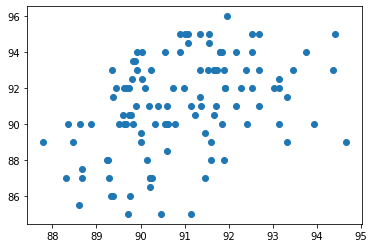

In [18]:
plt.scatter(y_pred_1, y_1)
plt.show()

In [20]:
thn_corr, _ =  pearsonr(y_pred_1, y_1)
thn_corr

0.40589679996396677

CNN

In [23]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [41]:
x_0 = x_0.reshape(x_0.shape[0], x_0.shape[1], 1)

xtrain, xtest, ytrain, ytest = train_test_split(x_0, y_0, test_size=0.33)

model = Sequential()
model.add(Conv1D(100, 2, activation="relu", input_shape=(6,1)))
# model.add(Conv1D(100, 2, activation="relu", input_shape=(6,1)))
# model.add(MaxPooling1D(pool_size = 2))
# model.add(Conv1D(64, 2, activation="relu", input_shape=(6,1)))
# # model.add(Conv1D(32, 2, activation="relu", input_shape=(6,1)))
model.add(MaxPooling1D(pool_size = 1))
model.add(Flatten())
# model.add(Dense(50, activation="relu"))
# model.add(Dense(5, activation="softmax"))
# model.compile(loss="mse", optimizer="adam")

model.add(Dense(100, activation='relu'))
# model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.fit(xtrain, ytrain, batch_size=12,epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 1ms/step - loss: 8372.5166 - root_mean_squared_error: 91.5015
Epoch 2/200
5/5 [==============================] - 0s 1ms/step - loss: 6617.6772 - root_mean_squared_error: 81.3491
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 5587.3999 - root_mean_squared_error: 74.7489
Epoch 4/200
5/5 [==============================] - 0s 1ms/step - loss: 4581.5518 - root_mean_squared_error: 67.6872
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 3487.5781 - root_mean_squared_error: 59.0557
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 2363.5901 - root_mean_squared_error: 48.6168
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 1347.8695 - root_mean_squared_error: 36.7133
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 565.3481 - root_mean_squared_error: 23.7771
Epoch 9/200
5/5 [==============================] - 0s 1ms/step - loss: 12

5/5 [==============================] - 0s 1ms/step - loss: 12.0771 - root_mean_squared_error: 3.4752
Epoch 73/200
5/5 [==============================] - 0s 1ms/step - loss: 12.0601 - root_mean_squared_error: 3.4728
Epoch 74/200
5/5 [==============================] - 0s 1ms/step - loss: 11.9749 - root_mean_squared_error: 3.4605
Epoch 75/200
5/5 [==============================] - 0s 1ms/step - loss: 11.9922 - root_mean_squared_error: 3.4630
Epoch 76/200
5/5 [==============================] - 0s 1ms/step - loss: 11.9793 - root_mean_squared_error: 3.4611
Epoch 77/200
5/5 [==============================] - 0s 1ms/step - loss: 11.8510 - root_mean_squared_error: 3.4425
Epoch 78/200
5/5 [==============================] - 0s 1ms/step - loss: 11.7910 - root_mean_squared_error: 3.4338
Epoch 79/200
5/5 [==============================] - 0s 1ms/step - loss: 11.7968 - root_mean_squared_error: 3.4347
Epoch 80/200
5/5 [==============================] - 0s 1ms/step - loss: 11.7738 - root_mean_squared_e

5/5 [==============================] - 0s 1ms/step - loss: 9.8790 - root_mean_squared_error: 3.1431
Epoch 144/200
5/5 [==============================] - 0s 1ms/step - loss: 9.5625 - root_mean_squared_error: 3.0923
Epoch 145/200
5/5 [==============================] - 0s 1ms/step - loss: 9.5899 - root_mean_squared_error: 3.0968
Epoch 146/200
5/5 [==============================] - 0s 1ms/step - loss: 9.5484 - root_mean_squared_error: 3.0901
Epoch 147/200
5/5 [==============================] - 0s 1ms/step - loss: 9.5529 - root_mean_squared_error: 3.0908
Epoch 148/200
5/5 [==============================] - 0s 1ms/step - loss: 9.4944 - root_mean_squared_error: 3.0813
Epoch 149/200
5/5 [==============================] - 0s 1ms/step - loss: 9.5437 - root_mean_squared_error: 3.0893
Epoch 150/200
5/5 [==============================] - 0s 1ms/step - loss: 9.5243 - root_mean_squared_error: 3.0861
Epoch 151/200
5/5 [==============================] - 0s 1ms/step - loss: 9.3789 - root_mean_squared_er

In [25]:
preds = model.predict(xtest)

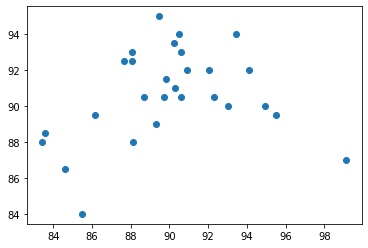

In [26]:
plt.scatter(preds, ytest)
plt.show()

In [34]:
cnn_corr, _ =  pearsonr(preds.T[0], ytest)
cnn_corr

0.2385454191016819

In [42]:
np.sqrt(np.sum((preds.T[0] - ytest)**2) / len(ytest))

4.048620284694579

In [35]:
x_1 = x_1.reshape(x_1.shape[0], x_1.shape[1], 1)

xtrain, xtest, ytrain, ytest = train_test_split(x_1, y_1, test_size=0.33)

model2 = Sequential()
model2.add(Conv1D(100, 2, activation="relu", input_shape=(6,1)))
# model.add(Conv1D(100, 2, activation="relu", input_shape=(6,1)))
# model.add(MaxPooling1D(pool_size = 2))
# model.add(Conv1D(64, 2, activation="relu", input_shape=(6,1)))
# # model.add(Conv1D(32, 2, activation="relu", input_shape=(6,1)))
model2.add(MaxPooling1D(pool_size = 1))
model2.add(Flatten())
# model.add(Dense(50, activation="relu"))
# model.add(Dense(5, activation="softmax"))
# model.compile(loss="mse", optimizer="adam")

model2.add(Dense(100, activation='relu'))
# model.add(Dense(100, activation='relu'))
model2.add(Dense(1, activation='linear'))

# compile the model
model2.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

model2.fit(xtrain, ytrain, batch_size=12,epochs=200)

Epoch 1/200
7/7 [==============================] - 0s 1ms/step - loss: 7643.4106 - root_mean_squared_error: 87.4266
Epoch 2/200
7/7 [==============================] - 0s 2ms/step - loss: 6058.1938 - root_mean_squared_error: 77.8344
Epoch 3/200
7/7 [==============================] - 0s 1ms/step - loss: 4515.6816 - root_mean_squared_error: 67.1988
Epoch 4/200
7/7 [==============================] - 0s 1ms/step - loss: 2848.3191 - root_mean_squared_error: 53.3696
Epoch 5/200
7/7 [==============================] - 0s 1ms/step - loss: 1300.5879 - root_mean_squared_error: 36.0637
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 293.2946 - root_mean_squared_error: 17.1258
Epoch 7/200
7/7 [==============================] - 0s 1ms/step - loss: 73.8168 - root_mean_squared_error: 8.5917
Epoch 8/200
7/7 [==============================] - 0s 1ms/step - loss: 139.0379 - root_mean_squared_error: 11.7914
Epoch 9/200
7/7 [==============================] - 0s 1ms/step - loss: 80.106

7/7 [==============================] - 0s 1ms/step - loss: 23.9744 - root_mean_squared_error: 4.8964
Epoch 73/200
7/7 [==============================] - 0s 1ms/step - loss: 22.6797 - root_mean_squared_error: 4.7623
Epoch 74/200
7/7 [==============================] - 0s 2ms/step - loss: 23.0176 - root_mean_squared_error: 4.7977
Epoch 75/200
7/7 [==============================] - 0s 2ms/step - loss: 22.8807 - root_mean_squared_error: 4.7834
Epoch 76/200
7/7 [==============================] - 0s 2ms/step - loss: 22.4047 - root_mean_squared_error: 4.7334
Epoch 77/200
7/7 [==============================] - 0s 1ms/step - loss: 23.2194 - root_mean_squared_error: 4.8187
Epoch 78/200
7/7 [==============================] - 0s 1ms/step - loss: 22.6564 - root_mean_squared_error: 4.7599
Epoch 79/200
7/7 [==============================] - 0s 1ms/step - loss: 22.3789 - root_mean_squared_error: 4.7306
Epoch 80/200
7/7 [==============================] - 0s 1ms/step - loss: 22.5452 - root_mean_squared_e

7/7 [==============================] - 0s 1ms/step - loss: 20.9887 - root_mean_squared_error: 4.5813
Epoch 144/200
7/7 [==============================] - 0s 2ms/step - loss: 21.2004 - root_mean_squared_error: 4.6044
Epoch 145/200
7/7 [==============================] - 0s 2ms/step - loss: 21.3371 - root_mean_squared_error: 4.6192
Epoch 146/200
7/7 [==============================] - 0s 1ms/step - loss: 21.6465 - root_mean_squared_error: 4.6526
Epoch 147/200
7/7 [==============================] - 0s 1ms/step - loss: 20.5253 - root_mean_squared_error: 4.5305
Epoch 148/200
7/7 [==============================] - 0s 1ms/step - loss: 21.5308 - root_mean_squared_error: 4.6401
Epoch 149/200
7/7 [==============================] - 0s 2ms/step - loss: 22.4035 - root_mean_squared_error: 4.7332
Epoch 150/200
7/7 [==============================] - 0s 1ms/step - loss: 20.7876 - root_mean_squared_error: 4.5593
Epoch 151/200
7/7 [==============================] - 0s 1ms/step - loss: 22.0040 - root_mean_s

In [36]:
preds2 = model2.predict(xtest)

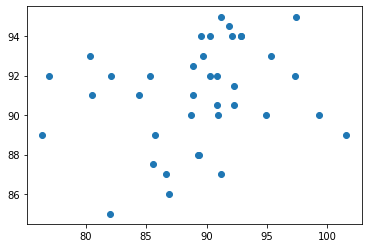

In [37]:
plt.scatter(preds2, ytest)
plt.show()

In [38]:
cnn2_corr, _ =  pearsonr(preds2.T[0], ytest)
cnn2_corr

0.23186639251078867

In [40]:
np.sqrt(np.sum((preds2.T[0] - ytest)**2) / len(ytest))

5.840649476289452